# Homework 2

## Pair Programming Group Number: Group 20
## Members of Team: 2
## Jeremy Ulfohn, Anthony Roth-Giacinto

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [3]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/yanyanzheng96/8fe13cc4b7c6a1391d4841018340a627/raw/f17479a580783a810cfe119186e63b5b28a87b4c/melb_data.csv'
df = pd.read_csv(url)
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function of that vector using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

Text(0.5, 1.0, 'Discrete PDF Histogram')

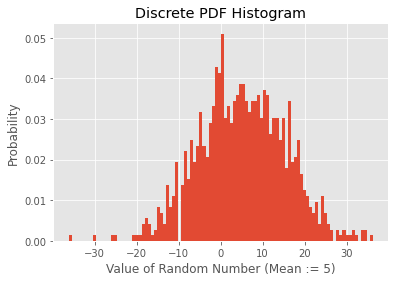

In [2]:
random1000 = np.random.normal(loc=5.0, scale=10.0, size=1000) # loc = mean, scale = SD
# axis labels and plot title required

#For plotting
%matplotlib inline
plt.style.use('ggplot') # fig is default name of any new figure
fig, ax0 = plt.subplots(ncols=1, nrows=1) #creating plot axes
(values, bins, _) = ax0.hist(random1000, bins=100, density=True, label="Histogram of samples")
ax0.set_xlabel("Value of Random Number (Mean := 5)")
ax0.set_ylabel("Probability")
ax0.set_title("Discrete PDF Histogram")

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph.
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  You can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to draw the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

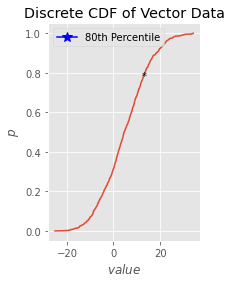

In [ ]:
# CUMULATIVE df using LINE graph
# star point x :== 80th percentile
# sort the data:
data = random1000
data_sorted = np.sort(data)

# calculate the proportional values of samples
# np.arrange() creates evenly-spaced values within the given interval
p = 1. * np.arange(len(data)) / (len(data) - 1)

# plot the sorted data:
fig = plt.figure()
ax2 = fig.add_subplot(121) # 121 <==> 1 X 2 grid, 1st subplot
ax2.plot(data_sorted, p)
ax2.set_xlabel('$value$') # add required labels
ax2.set_ylabel('$p$')
ax2.set_title('Discrete CDF of Vector Data')
ax2.annotate(xy=[12, 0.77], s="*")
# annotate in a star at point x := p == 0.8
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=10, label='80th Percentile')
ax2.legend(handles=[blue_line])

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


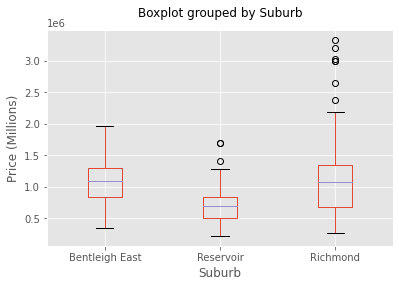

In [51]:
# csv is already imported as df above
# select only the 3 suburbs, then only the "Suburb" and "Price" columns
listSubs = ["Reservoir", "Richmond", "Bentleigh East"]
threeSubs = df.loc[df["Suburb"].isin(listSubs)][["Suburb", "Price"]]

# create boxplot
bp = threeSubs.boxplot(by="Suburb", column=["Price"]) # 'by' is number of boxes/x
bp.set_ylabel("Price (Millions)") # default x label is already fine
bp.set_title("")



## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

[[ 1  1]
 [-1  0]]


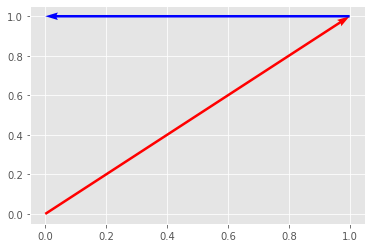

[[ 1.11022302e-16  1.41421356e+00]
 [-7.07106781e-01 -7.07106781e-01]]


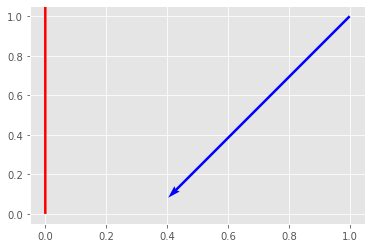

In [149]:
V = np.array([[ 1, 1],
              [-1, 0]
              ]) # arrow DIRECTION (NOT the coordinate)
print(V)
origin = np.array([[0, 1],
                   [0, 1]
                   ]) # arrow origins points (*unpacked)
# scale_units = 'xy' mandatory to prevent incorrect autoscaling
plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], angles='xy', scale_units='xy', scale=1)
plt.show()

# perform rotation, using R := known rotation matrix
# positive degree of 45 will be CCW / leftward rotation
# origin unaffected
# default np.trig units: RADIANS ==> 45 deg === pi/4 rad
rad = np.pi/4

R = np.array([[np.cos(rad), -np.sin(rad)],
              [np.sin(rad),  np.cos(rad)]
              ])

vr1 = np.matmul(R, V[0]) # np.matmul NOT associative! R must be first
vr2 = np.matmul(R, V[1])
Vrot = np.array([vr1, vr2])
print(Vrot)
plt.quiver(*origin, Vrot[:,0], Vrot[:,1], color=['r','b','g'], scale_units='xy', scale=1)
plt.show()







## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [156]:
col1 = [2, 1, 1]
col2 = [4, -6, 0]
col3 = [-2, 7, 2]
A = np.asarray([col1, col2, col3]) # np.asarray() to form 3x3 matrix A
b = [5, -2, 9]

from numpy.linalg import inv
ainv = inv(A)
xyz = np.dot(ainv, b)
print("x == ", int(xyz[0]))
print("y == ", int(xyz[1]))
print("z == ", int(xyz[2]))



x ==  1
y ==  1
z ==  2
